In [1]:
# Working directory
import os
print('Current working directiry: ', os.getcwd())
print('List of files in working directory : ', os.listdir())

Current working directiry:  C:\Users\Santosh Sharma\Desktop\coursera-machine-learning-stanford\PCA
List of files in working directory :  ['.ipynb_checkpoints', 'bird_small.png', 'ex7data1.mat', 'ex7faces.mat', 'PCA on example dataset.ipynb', 'PCA on face image dataset.ipynb']


In [17]:
# Import libraries
import numpy as np
import pandas as pd
from scipy.io import loadmat
from skimage import io
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# set plot background
plt.style.use('seaborn-white')

In [3]:
# Normalize the features in X 
def featureNormalize(X):
    mu = np.zeros(shape = (X.shape[1], 1))
    sigma = np.zeros(shape = (X.shape[1], 1))
    X_norm = np.zeros(shape = (X.shape))
    
    for col in range(X.shape[1]):
        avg = X[:, col].mean()
        sd = X[:, col].std() 
        X_norm[:, col] = (X[:, col] - avg) / sd
        mu[col] = avg
        sigma[col] = sd
        
    return X_norm, mu, sigma 

In [4]:
# PCA
def Pca(X):
    # Initialize values
    m,n = X.shape
    
    # Return
    U = np.zeros(shape = (n,n))
    S = np.zeros(shape = (n))
    
    # Compute co-variance matrix
    cov_matrix = (1/m) * np.dot(X.T, X)
    
    # Compute 'eigenvectors'
    U,S,V = np.linalg.svd(cov_matrix)
    U = U
    S = S
    
    return U,S

In [5]:
# Project data on to the top k eigenvectors
def projectData(X,U,k):
    # Initialize values
    m,n = X.shape
    
    # Return
    Z = np.zeros(shape=(m,k))
    
    # Compute projection of data
    Z = np.dot(X, U[:,:k])
    
    return Z

In [6]:
# Recover an approximation of the original data using projected data
def recoverData(Z, U, k):
    # Return
    X_recover = np.zeros(shape = (Z.shape[1],U.shape[1]))
    u_reduce = U[:,:k]
    
    # compute
    X_recover = np.dot(Z, u_reduce.T)
    
    return X_recover

In [7]:
# Display data
def displayData(X,h,v):
    images = []
    for i in range(X.shape[0]):
        images.append(X[i,:].reshape(32,32,order='F'))
    
    plt.style.use('seaborn-white')    
    fig, ax = plt.subplots(h,v, figsize=(5,5))
    fig.subplots_adjust(hspace = 0.0, wspace = 0.0)
    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i], cmap = 'gray')
        axi.set(xticks = [], yticks = [])

Loading Face dataset...
Shape of data:  (5000, 1024) 

Data examples
[[-37.86631387 -45.86631387]
 [  8.13368613  -0.86631387]]
First 100 images...


<IPython.core.display.Javascript object>


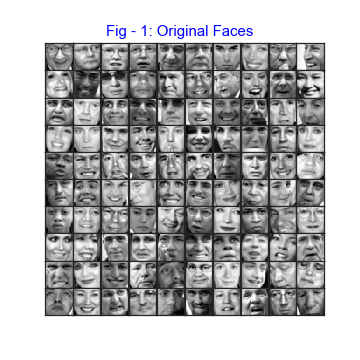


Running PCA on face dataset...



<IPython.core.display.Javascript object>


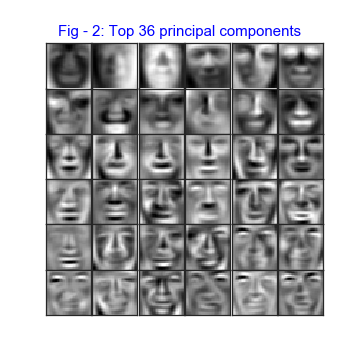

Dimension reduction for face dataset...

The projected data Z has a size of : (5000, 100) 

Visualizing the projected(reduced dimension) faces.


<IPython.core.display.Javascript object>


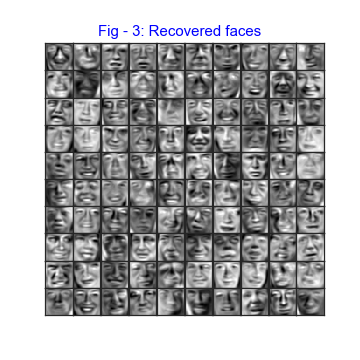

In [18]:
# Run PCA algorithm
# Visulaise face dataset.
print('Loading Face dataset...')

# load data
face_data = loadmat('ex7faces.mat')
X = face_data['X']
print('Shape of data: ', X.shape,'\n')
print('Data examples')
print(X[:2,:2])

# Display the first 100 faces in the dataset
print('First 100 images...')
displayData(X,h = 10, v = 10)
#plt.suptitle('Original Faces', x = 0.5, y= 0.93, fontsize = 15);
plt.figtext(0.5, 0.90, "Fig - 1: Original Faces", fontsize = 15, color = 'b', ha ='center');
print()

# PCA on face dataset, eigenfaces.
print('Running PCA on face dataset...\n')

# Normalize the dataset.
X_norm, mu, sigma = featureNormalize(X)

# Run PCA
U, S = Pca(X_norm)

# Visualize the top 36 eigenvectors found.
displayData(U[:,:36].T,h=6,v=6)
plt.figtext(0.5, 0.90, "Fig - 2: Top 36 principal components", fontsize = 15, color = 'b', ha ='center');

# Dimension Reduction for Face dataset.
print('Dimension reduction for face dataset...''\n')

k = 100
Z = projectData(X_norm, U, k)
print('The projected data Z has a size of :', Z.shape,'\n')

# Visualization of Faces after PCA Dimension Reduction
print('Visualizing the projected(reduced dimension) faces.')

# Reconstruct faces with top k principal components.
# Display the faces.
X_rec = recoverData(Z, U, k)
displayData(X_rec,h=10,v=10)
plt.figtext(0.5,0.90,'Fig - 3: Recovered faces', fontsize = 15, color = 'b', ha = 'center');

# PCA FOR VISUALIZATION
Import K-means algorithm

In [19]:
# Read image.
original_img = io.imread('bird_small.png')

X = original_img.reshape(original_img.shape[0] * original_img.shape[1], 3)
bird_x = X/255

# Initialize random centroids
def random_centroids(X, k):
    '''
    This function initializes K centroids that are to be used in K-Means on the dataset X
    '''
    # Initialize value
    # no. of row and columns
    m,n = X.shape
    
    # Return 
    centroids = np.zeros(shape = (k, n))
    
    #
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[0:k]]
    
    return centroids

def findClosestCentroids(X, centroids):
    '''
    This function computes the centroid memberships for every example
    '''
    # Initialize values
    k = centroids.shape[0]
    m = X.shape[0]
    #distance = np.zeros(centroids.shape)
    
    # Return
    idx = np.zeros(shape = (m, 1), dtype = int)
    distance = np.zeros(shape = (k,1))
    
    # Compute centroid
    for i in range(m):
        for j in range(k):
            distance[j] = np.sum(np.square(X[i,:] - centroids[j,:]), axis = 0)
        
        idx[i, :] = np.argmin(distance)
        
    return idx     

def ComputeCentroid(X, idx, k):
    """
    This function returns the new centroids by computing the means of the data points assigned to each centroid.
    """
    # Initialize values
    m, n = X.shape
    
    # Return
    centroid_mean = np.zeros(shape = (k, n))
    
    # Loop over k
    for i in range(k):
        #temp = X[np.squeeze(idx) == i, :]
        #centroid_mean[i-1, :] = np.mean(temp, axis = 0)
        centroid_mean[i, :] =  X[np.squeeze(idx) == i, :].mean(axis = 0)
    return centroid_mean   

def train_k_means(X, k, max_iters, print_iteration = False):
    # initialize values
    m, n = X.shape
    centroids = random_centroids(X, k)
    idx = np.zeros(shape = (m,1))
    d =  {}
    
    # Run K-Means
    for i in range(max_iters):
        # print if print_iteration is True.
        if print_iteration:
            print('K-Means iteration {:<2} / {}...'.format(i+1, max_iters))
        
        # for each example if x assign it to closest centroid.
        idx = findClosestCentroids(X, centroids)
        
        # Given the membership, compute new centroids.
        centroids = ComputeCentroid(X, idx, k)
      
    return idx,centroids

In [20]:
# Apply k-Means on  Bird image.
print('Running K-Means clustering on pixels from an image...\n')
idx, centroids = train_k_means(bird_x, k = 16, max_iters = 10, print_iteration = True)
print('................')

Running K-Means clustering on pixels from an image...

K-Means iteration 1  / 10...
K-Means iteration 2  / 10...
K-Means iteration 3  / 10...
K-Means iteration 4  / 10...
K-Means iteration 5  / 10...
K-Means iteration 6  / 10...
K-Means iteration 7  / 10...
K-Means iteration 8  / 10...
K-Means iteration 9  / 10...
K-Means iteration 10 / 10...
................


<IPython.core.display.Javascript object>


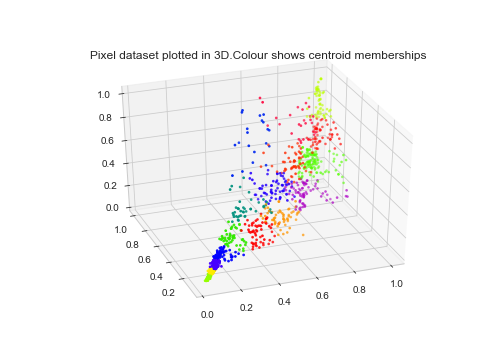

In [21]:
# Plot in 3D
%matplotlib notebook
# Sample 1000 random indexes
sel = np.random.randint(0,16388,size=(1000,1))
xs = bird_x[np.squeeze(sel),0]
ys = bird_x[np.squeeze(sel),1]
zs = bird_x[np.squeeze(sel),2]
#
fig = plt.figure(figsize=(7,5))
plt.style.use('seaborn-whitegrid')
ax = plt.axes(projection='3d')
color = np.squeeze(idx[np.squeeze(sel),:])
ax.scatter3D(xs, ys, zs, c = color,marker = 'o', s=3, cmap = plt.cm.get_cmap('prism', 16))
plt.title('Pixel dataset plotted in 3D.Colour shows centroid memberships')
fig.show()


<IPython.core.display.Javascript object>


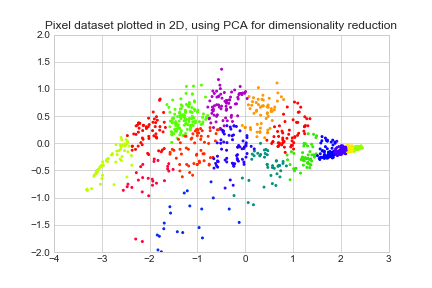

In [22]:
# Use PCA to project this cloud to 2D for visualization
# Normalize the dataset to use PCA
X_norm, mu, sigma = featureNormalize(bird_x)

# Run PCA
U, S = Pca(X_norm)
Z = projectData(X_norm, U, k=16)

# Plot in 2D
plt.scatter(Z[:,0][np.squeeze(sel)],Z[:,1][np.squeeze(sel)],marker = '.', s = 15, c = idx[:,0][np.squeeze(sel)],
            cmap = plt.cm.get_cmap('prism', 16))
plt.axis([-4,3,-2,2])
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
fig.show()